In [2]:
import torch
from torch import nn
from matplotlib import pyplot as plt
from torch.utils.data import DataLoader, TensorDataset

torch.manual_seed(42)

device = "cuda" if torch.cuda.is_available() else "cpu"

X = torch.arange(0, 1, 0.02).unsqueeze(1) # go from 1D tensor of size [50] to a 2D tensor of size [50, 1]Ï
y = torch.rand(50).unsqueeze(1)

split_index = int(len(X) * 0.8)
X_train = X[:split_index]
y_train = y[:split_index]
X_test = X[split_index:]
y_test = y[split_index:]

X_train = X_train.to(device)
y_train = y_train.to(device)
X_test = X_test.to(device)
y_test = y_test.to(device)

train_data = TensorDataset(X_train, y_train)
test_data = TensorDataset(X_test, y_test)

train_loader = DataLoader(train_data, batch_size=8, shuffle=True)
test_loader = DataLoader(test_data, batch_size=8, shuffle=False)

def plot_predictions(X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test, y_predictions=None) -> None:
  plt.scatter(X_train.cpu(), y_train.cpu(), c="b", s=4, label="training data")
  plt.scatter(X_test.cpu(), y_test.cpu(), c="g", s=4, label="testing data")
  if y_predictions is not None:
    plt.scatter(X_test.cpu(), y_predictions.cpu(), c="r", s=4, label="predictions")
  plt.legend(prop={"size": 14})
  plt.show()

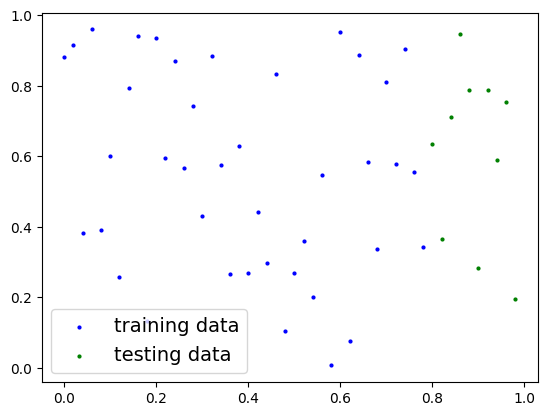

In [3]:
plot_predictions()

In [4]:
X_train.size(), y_train.size(), X_test.size(), y_test.size()

(torch.Size([40, 1]),
 torch.Size([40, 1]),
 torch.Size([10, 1]),
 torch.Size([10, 1]))

In [5]:
class RandomGuesserModel(nn.Module):
  def __init__(self) -> None:
    super().__init__()

    self.layer_0 = nn.Linear(in_features=1, out_features=64) # input to hidden layer
    self.layer_1 = nn.Linear(in_features=64, out_features=32) # hidden to hidden layer
    self.layer_2 = nn.Linear(in_features=32, out_features=1) # hidden to output layer

  def forward(self, input: torch.Tensor) -> torch.Tensor:
    output_0 = self.layer_0(input)
    output_1 = self.layer_1(output_0)
    output_2 = self.layer_2(output_1)
    return output_2

In [6]:
torch.manual_seed(42)
model_0 = RandomGuesserModel().to(device)
model_0.state_dict()

OrderedDict([('layer_0.weight',
              tensor([[ 0.7645],
                      [ 0.8300],
                      [-0.2343],
                      [ 0.9186],
                      [-0.2191],
                      [ 0.2018],
                      [-0.4869],
                      [ 0.5873],
                      [ 0.8815],
                      [-0.7336],
                      [ 0.8692],
                      [ 0.1872],
                      [ 0.7388],
                      [ 0.1354],
                      [ 0.4822],
                      [-0.1412],
                      [ 0.7709],
                      [ 0.1478],
                      [-0.4668],
                      [ 0.2549],
                      [-0.4607],
                      [-0.1173],
                      [-0.4062],
                      [ 0.6634],
                      [-0.7894],
                      [-0.4610],
                      [-0.2824],
                      [-0.6013],
                      [ 0.0944],
           

In [7]:
loss_fn = nn.MSELoss()

optimizer = torch.optim.Adam(model_0.parameters(), lr=0.0001)

In [8]:
epochs = 1000
for epoch in range(epochs):
  for batch_X, batch_y in train_loader:
    model_0.train() # set to training mode
    y_preds = model_0(batch_X)
    loss = loss_fn(y_preds, batch_y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if epoch % 10 == 0:
      model_0.eval() # set to evaluation mode
      with torch.inference_mode():
        test_preds = model_0(X_test)
        test_loss = loss_fn(test_preds, y_test)
        print(f"Epoch: {epoch} | Loss: {loss} | Test Loss: {test_loss}")

Epoch: 0 | Loss: 0.17544378340244293 | Test Loss: 0.4476345479488373
Epoch: 0 | Loss: 0.11495684087276459 | Test Loss: 0.4336402118206024
Epoch: 0 | Loss: 0.21862728893756866 | Test Loss: 0.41971227526664734
Epoch: 0 | Loss: 0.2897244095802307 | Test Loss: 0.40596601366996765
Epoch: 0 | Loss: 0.33542078733444214 | Test Loss: 0.392375111579895
Epoch: 10 | Loss: 0.06366998702287674 | Test Loss: 0.10057852417230606
Epoch: 10 | Loss: 0.043623894453048706 | Test Loss: 0.09920579195022583
Epoch: 10 | Loss: 0.10251569747924805 | Test Loss: 0.09762304276227951
Epoch: 10 | Loss: 0.06569211184978485 | Test Loss: 0.09621351212263107
Epoch: 10 | Loss: 0.10878992080688477 | Test Loss: 0.09540209174156189
Epoch: 20 | Loss: 0.07307890802621841 | Test Loss: 0.09375806897878647
Epoch: 20 | Loss: 0.10026231408119202 | Test Loss: 0.09417156875133514
Epoch: 20 | Loss: 0.05944395065307617 | Test Loss: 0.09457768499851227
Epoch: 20 | Loss: 0.08297063410282135 | Test Loss: 0.09444796293973923
Epoch: 20 | Los

Epoch: 999 | Test Loss: 0.08703847229480743


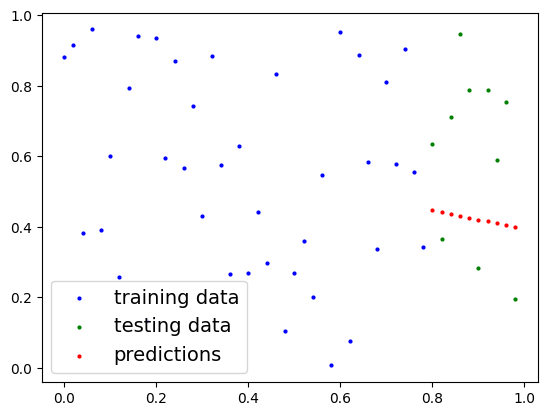

In [9]:
model_0.eval() # set to evaluation mode
with torch.inference_mode():
  test_preds = model_0(X_test)
  test_loss = loss_fn(test_preds, y_test)
  print(f"Epoch: {epoch} | Test Loss: {test_loss}")
  plot_predictions(y_predictions=test_preds.cpu())